In [29]:
import json

In [96]:
text_only_file = "/home/oanh/uncertainty/VL-Uncertainty/exp_decompose/log_2025_01_29_language_only_True_language_support_False.json"
text_support_file = "/home/oanh/uncertainty/VL-Uncertainty/exp_decompose/log_2025_01_29_language_only_False_language_support_True.json"
image_text_file = "/home/oanh/uncertainty/VL-Uncertainty/exp_decompose/log_2025_01_29_language_only_False_language_support_False.json"

In [97]:
with open(text_only_file, 'r', encoding='utf-8') as f:
    text_only = json.load(f)
print(text_only)
with open(text_support_file, 'r', encoding='utf-8') as f1:
    text_support = json.load(f1)
print(text_support)
with open(image_text_file, 'r', encoding='utf-8') as f2:
    image_text = json.load(f2)
print(image_text)

{'args': 'Namespace(lvlm=\'Qwen2-VL-7B-Instruct\', benchmark=\'MMVet\', llm=\'Qwen2.5-3B-Instruct\', uncertainty=\'vl_uncertainty\', uncertainty_thres=1.0, visual_perturbation=\'blurring\', blur_radius_list=[0.6, 0.8, 1.0, 1.2, 1.4], textual_perturbation=\'llm_rephrasing\', textual_perturbation_temp_list=[0.1, 0.2, 0.3, 0.4, 0.5], textual_perturbation_instruction_template="Given the input question: \'{question}\', generate a semantically equivalent variation by changing the wording, structure, grammar, or narrative. Ensure the perturbed question maintains the same meaning as the original. Provide only the rephrased question as the output.", pair_order=\'progressively\', inference_temp=0.1, sampling_temp=0.5, sampling_time=5, benchmark_size=300, language_only=True, language_support=False)', 'begin_time_str': '2025_01_29', '0': {'question': 'What is x in the equation?\nNOTE: Provide only the final answer. Do not provide unrelated details.', 'gt_ans': '-1<AND>-5', 'flag_sample_valid': Tru

In [98]:
print(len(text_only))
print(text_only['154']['uncertainty'])
print(text_support['154']['uncertainty'])
print(image_text['154']['uncertainty'])

223
2.321928094887362
1.9219280948873623
2.321928094887362


In [99]:
# total_difference = 0
# case_to_check = []
def compare_two_logs(log1, log2):
    case_to_check = []
    for i in range(len(log1) - 5):
        difference = 0
        # print(log1[str(i)]['uncertainty'])
        # print(log2[str(i)]['uncertainty'])
        difference += log1[str(i)]['uncertainty'] - log2[str(i)]['uncertainty'] 
        total_difference += difference
        # print(f'difference (log1 - log2): sample {i}')
        # print(difference)
        if(difference > 0.3):
            case_to_check.append(i) 
        print("")
        
def compare_three_logs(text_only, text_support, image_text, setting: list):
    case_to_check_text_only = []
    for i in range(len(text_only) - 5):
        if(setting[0] == "low"):
            if(text_only[str(i)]['uncertainty'] < 1):
                case_to_check_text_only.append(i)
        elif(setting[0] == "high"):
            if(text_only[str(i)]['uncertainty'] >= 1):
                case_to_check_text_only.append(i)    
    print(len(case_to_check_text_only))
    case_to_check_text_support = []
    for i in case_to_check_text_only:
        if(setting[1] == "low"):
            if(text_support[str(i)]['uncertainty'] < 1):
                case_to_check_text_support.append(i)
        elif(setting[1] == "high"):
            if(text_support[str(i)]['uncertainty'] >= 1):
                case_to_check_text_support.append(i)
    print(len(case_to_check_text_support))
    case_to_check_image_text = []  
    for i in case_to_check_text_support:
        if(setting[2] == "low"):
            if(image_text[str(i)]['uncertainty'] < 1):
                case_to_check_image_text.append(i)
        elif(setting[2] == "high"):
            if(image_text[str(i)]['uncertainty'] >= 1):
                case_to_check_image_text.append(i)
    print(len(case_to_check_image_text))
    return case_to_check_image_text

In [100]:
def check_answer_agreement(case_to_check, text_only, text_support, image_text):
    all_agree_case = []
    disagree_case = []
    for i in case_to_check:
        text_only_answer = text_only[str(i)]['ans']
        text_support_answer = text_support[str(i)]['ans']  
        image_text_answer = image_text[str(i)]['ans']
        if(text_only_answer == text_support_answer and text_support_answer == image_text_answer):
            all_agree_case.append(i)
        else:
            disagree_case.append(i)
            # print(f"sample {i}")
            # print(f"text_only: {text_only[str(i)]['ans']}")
            # print(f"text_support: {text_support[str(i)]['ans']}")
            # print(f"image_text: {image_text[str(i)]['ans']}")            
    return all_agree_case, disagree_case

In [101]:
setting = ["low", "low", "low"]
case_to_check = compare_three_logs(text_only, text_support, image_text, setting)
all_agree_case, disagree_case = check_answer_agreement(case_to_check, text_only, text_support, image_text)

84
69
55


In [102]:
print(len(case_to_check[:-4]))
print(case_to_check[:-5])
print(len(all_agree_case))
print(all_agree_case)
print(len(disagree_case))
print(disagree_case)

51
[3, 5, 15, 20, 21, 24, 27, 28, 31, 33, 43, 54, 59, 62, 65, 68, 79, 80, 81, 85, 88, 89, 94, 98, 99, 101, 106, 108, 110, 111, 112, 113, 114, 115, 117, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137]
25
[28, 31, 54, 68, 85, 94, 99, 106, 108, 110, 112, 113, 114, 115, 117, 120, 122, 123, 124, 125, 126, 134, 135, 136, 137]
30
[3, 5, 15, 20, 21, 24, 27, 33, 43, 59, 62, 65, 79, 80, 81, 88, 89, 98, 101, 111, 121, 127, 128, 129, 130, 142, 143, 146, 179, 202]


In [103]:
for i in all_agree_case:
    # print(i)
    if(image_text[str(i)]['flag_ans_correct'] == False):
        print(i)

54


In [116]:
wrong_case = []
for i in disagree_case:
    # print(i)
    if(image_text[str(i)]['flag_ans_correct'] == True and text_support[str(i)]['ans'] != image_text[str(i)]['ans']):
        print(i)
        wrong_case.append(i)
print(len(wrong_case))
print(wrong_case)

15
20
43
80
121
143
146
179
8
[15, 20, 43, 80, 121, 143, 146, 179]


Test set size: 15
Accuracy: 80.00%

Feature Rankings:
1. Text Support vs Image Text (0.680760)
2. Image Text vs Text Only (0.232808)
3. Text Only vs Text Support (0.086432)


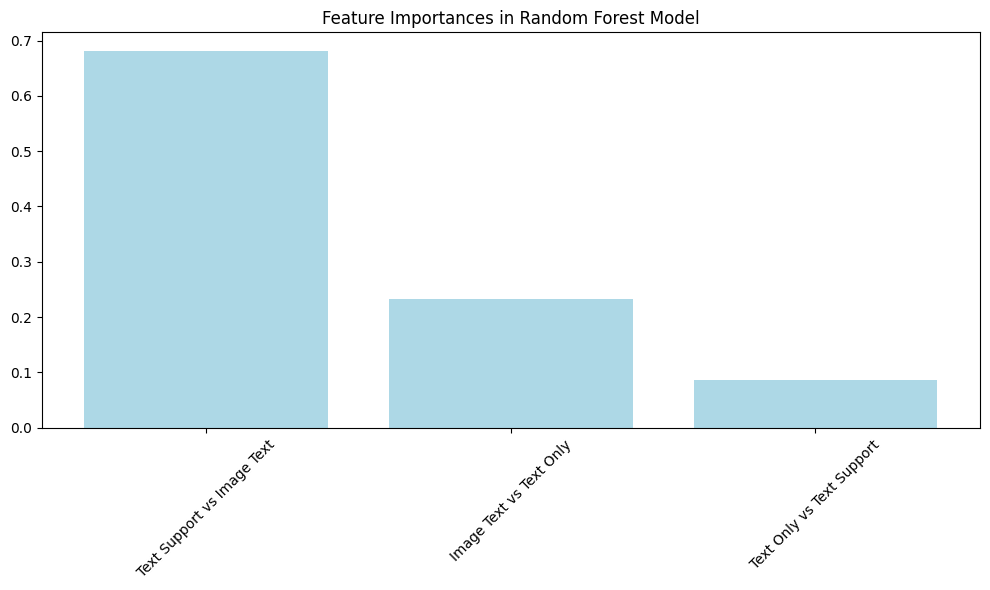

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
data = []
labels = []

for i in case_to_check[:-5]:
    text_only_answer = text_only[str(i)]['ans']
    text_support_answer = text_support[str(i)]['ans']
    image_text_answer = image_text[str(i)]['ans']
    image_text_correct = image_text[str(i)]['flag_ans_correct']
    
    # Check if there are differences between answers
    text_only_val = 1 if text_only_answer != text_support_answer else 0
    text_support_val = 1 if text_support_answer != image_text_answer else 0
    image_text_val = 1 if image_text_answer != text_only_answer else 0
    
    data.append([text_only_val, text_support_val, image_text_val])
    labels.append(0 if image_text_correct else 1)  # 0 for correct, 1 for wrong

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
print(f"Test set size: {len(y_test)}")

# Create and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate feature importance
feature_names = ['Text Only vs Text Support', 
                'Text Support vs Image Text', 
                'Image Text vs Text Only']
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature rankings
print("\nFeature Rankings:")
for f in range(len(feature_names)):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest Model")
plt.bar(range(len(feature_names)), importances[indices],
        color="lightblue", align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# Example usage function with probability scores
def predict_image_text_correctness(text_only_answer, text_support_answer, image_text_answer):
    text_only_val = 1 if text_only_answer != text_support_answer else 0
    text_support_val = 1 if text_support_answer != image_text_answer else 0
    image_text_val = 1 if image_text_answer != text_only_answer else 0
    
    # Get both prediction and probability
    prediction = clf.predict([[text_only_val, text_support_val, image_text_val]])
    prob = clf.predict_proba([[text_only_val, text_support_val, image_text_val]])
    
    result = 'Correct' if prediction[0] == 0 else 'Wrong'
    confidence = prob[0][0] if prediction[0] == 0 else prob[0][1]
    
    return {
        'prediction': result,
        'confidence': f'{confidence:.2%}',
        'feature_values': {
            'Text Only vs Text Support': text_only_val,
            'Text Support vs Image Text': text_support_val,
            'Image Text vs Text Only': image_text_val
        }
    }

# Test the enhanced function
# print(predict_image_text_correctness('1 or -5', '1 or -5', '1 or -5'))

Test set size: 10
Accuracy: 90.00%

Feature Rankings:
1. Text Support vs Image Text (1.000000)


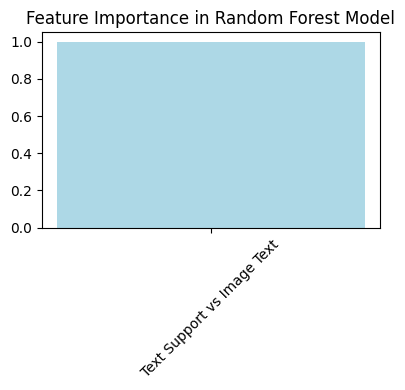

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
data = []
labels = []

for i in case_to_check[:-5]:
    text_only_answer = text_only[str(i)]['ans']
    text_support_answer = text_support[str(i)]['ans']
    image_text_answer = image_text[str(i)]['ans']
    image_text_correct = image_text[str(i)]['flag_ans_correct']
    
    # Calculate the single feature
    text_support_val = 1 if text_support_answer != image_text_answer else 0

    data.append([text_support_val]) # Only append the single feature
    labels.append(0 if image_text_correct else 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Test set size: {len(y_test)}")

# Create and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate feature importance
feature_names = ['Text Support vs Image Text'] # single feature name
importances = clf.feature_importances_

# Print feature rankings
print("\nFeature Rankings:")
for f in range(len(feature_names)):
    print("%d. %s (%f)" % (f + 1, feature_names[f], importances[f]))

# Plot feature importances
plt.figure(figsize=(4, 4)) #reduced figure size as we only have one bar
plt.title("Feature Importance in Random Forest Model")
plt.bar(range(len(feature_names)), importances,
        color="lightblue", align="center")
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.tight_layout()
plt.show()

# Example usage function with probability scores
def predict_image_text_correctness(text_only_answer, text_support_answer, image_text_answer):
    text_support_val = 1 if text_support_answer != image_text_answer else 0
    
    # Get both prediction and probability
    prediction = clf.predict([[text_support_val]])
    prob = clf.predict_proba([[text_support_val]])

    result = 'Correct' if prediction[0] == 0 else 'Wrong'
    confidence = prob[0][0] if prediction[0] == 0 else prob[0][1]
    
    return {
        'prediction': result,
        'confidence': f'{confidence:.2%}',
        'feature_values': {
            'Text Support vs Image Text': text_support_val
        }
    }

# Test the enhanced function
# print(predict_image_text_correctness('1 or -5', '1 or -5', '1 or -5'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
data = []
labels = []

for i in case_to_check:
    text_only_answer = text_only[str(i)]['ans']
    text_support_answer = text_support[str(i)]['ans']
    image_text_answer = image_text[str(i)]['ans']
    image_text_correct = image_text[str(i)]['flag_ans_correct']
    
    # Check if there are differences between answers
    text_only_val = 1 if text_only_answer != text_support_answer else 0
    text_support_val = 1 if text_support_answer != image_text_answer else 0
    image_text_val = 1 if image_text_answer != text_only_answer else 0
    
    data.append([text_only_val, text_support_val, image_text_val])
    labels.append(0 if image_text_correct else 1)  # 0 for correct, 1 for wrong

# Split the data into training and testing sets
# print(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)
print(len(y_test))

# Create and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Example usage
def predict_image_text_correctness(text_only_answer, text_support_answer, image_text_answer):
    text_only_val = 1 if text_only_answer != text_support_answer else 0
    text_support_val = 1 if text_support_answer != image_text_answer else 0
    image_text_val = 1 if image_text_answer != text_only_answer else 0
    
    prediction = clf.predict([[text_only_val, text_support_val, image_text_val]])
    return 'Correct' if prediction[0] == 0 else 'Wrong'

# Test the function
# print(predict_image_text_correctness('1 or -5', '1 or -5', '1 or -5'))rom sklearn.ensemble import RandomForestClassifier


In [9]:
print(total_difference)
print(difference)
print(len(case_to_check))
print(case_to_check)

20.34790072139561
0.6490224995673064
77
[1, 2, 6, 7, 16, 17, 18, 21, 22, 25, 26, 31, 32, 33, 35, 41, 42, 46, 56, 59, 60, 61, 70, 71, 74, 76, 77, 78, 80, 81, 86, 90, 91, 97, 102, 104, 105, 111, 116, 119, 130, 131, 132, 138, 139, 140, 141, 144, 145, 147, 153, 158, 162, 163, 169, 170, 171, 175, 176, 178, 181, 182, 188, 190, 191, 192, 194, 198, 199, 200, 202, 204, 207, 208, 214, 215, 217]


In [8]:
total_difference = 0
case_to_check = []
special_case_to_check = []
all_wrong = []
for i in range(len(text_only) - 5):
    difference = 0
    uncertainty_1 = text_only[str(i)]['uncertainty'] 
    uncertainty_2 = image_text[str(i)]['uncertainty'] 
    print(uncertainty_1)
    print(uncertainty_2)
    difference += uncertainty_1 - uncertainty_2 
    total_difference += difference
    print(f'difference (text_only - image_text): sample {i}')
    print(difference)
    if(uncertainty_1 > 1 and uncertainty_2 > 1):
        all_wrong.append(i)
    if( uncertainty_1 > 1 and uncertainty_2 < 1):
        case_to_check.append(i)
    if(difference > 0.3 and uncertainty_1 > 1 and uncertainty_2 > 1):
        special_case_to_check.append(i) 
    print("")

1.3709505944546687
1.9219280948873623
difference (log1 - log2): sample 0
-0.5509775004326936

1.9219280948873623
1.9219280948873623
difference (log1 - log2): sample 1
0.0

2.321928094887362
-0.0
difference (log1 - log2): sample 2
2.321928094887362

-0.0
-0.0
difference (log1 - log2): sample 3
0.0

-0.0
1.3709505944546687
difference (log1 - log2): sample 4
-1.3709505944546687

-0.0
0.7219280948873623
difference (log1 - log2): sample 5
-0.7219280948873623

-0.0
0.7219280948873623
difference (log1 - log2): sample 6
-0.7219280948873623

2.321928094887362
1.3709505944546687
difference (log1 - log2): sample 7
0.9509775004326935

1.3709505944546687
2.321928094887362
difference (log1 - log2): sample 8
-0.9509775004326935

2.321928094887362
1.9219280948873623
difference (log1 - log2): sample 9
0.3999999999999999

-0.0
1.3709505944546687
difference (log1 - log2): sample 10
-1.3709505944546687

-0.0
1.5219280948873621
difference (log1 - log2): sample 11
-1.5219280948873621

1.9219280948873623
1.3

In [9]:
print(len(all_wrong))
print(all_wrong)
print(len(case_to_check))
print((case_to_check))
print(len(special_case_to_check))
print((special_case_to_check))

94
[0, 1, 7, 8, 9, 12, 14, 19, 23, 25, 30, 32, 36, 37, 39, 40, 41, 45, 46, 48, 50, 53, 57, 63, 66, 72, 73, 75, 77, 82, 83, 84, 87, 96, 100, 107, 118, 119, 131, 132, 140, 141, 144, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 172, 173, 174, 177, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 196, 197, 200, 203, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216]
35
[2, 20, 22, 27, 33, 35, 43, 54, 59, 70, 71, 74, 76, 81, 86, 97, 101, 102, 104, 106, 113, 114, 116, 127, 138, 153, 169, 170, 171, 175, 176, 178, 198, 199, 207]
29
[7, 9, 12, 23, 25, 32, 37, 75, 77, 119, 131, 132, 140, 141, 144, 158, 162, 163, 173, 180, 181, 182, 188, 190, 191, 192, 196, 200, 216]


In [32]:

# list(set(case_to_check) & set(special_case_to_check))
# [2, 3]
checking_case = []
for element in case_to_check:
    if element in special_case_to_check:
        continue
    else: checking_case.append(element)
print(len(checking_case))
print((checking_case))

35
[2, 20, 22, 27, 33, 35, 43, 54, 59, 70, 71, 74, 76, 81, 86, 97, 101, 102, 104, 106, 113, 114, 116, 127, 138, 153, 169, 170, 171, 175, 176, 178, 198, 199, 207]


In [35]:
reverse_total_difference = 0
reverse_case_to_check = []
reverse_special_case_to_check = []
for i in range(len(text_only) - 5):
    difference = 0
    uncertainty_1 = text_only[str(i)]['uncertainty'] 
    uncertainty_2 = image_text[str(i)]['uncertainty'] 
    print(uncertainty_1)
    print(uncertainty_2)
    difference += uncertainty_1 - uncertainty_2 
    reverse_total_difference += difference
    print(f'difference (text_only - image_text): sample {i}')
    print(difference)
    if(difference < 0 and uncertainty_2 > 1):
        reverse_case_to_check.append(i)
    if(difference > 0 and uncertainty_1 < 1 and uncertainty_2 > 1):
        reverse_special_case_to_check.append(i) 
    print("")

1.3709505944546687
1.9219280948873623
difference (log1 - log2): sample 0
-0.5509775004326936

1.9219280948873623
1.9219280948873623
difference (log1 - log2): sample 1
0.0

2.321928094887362
-0.0
difference (log1 - log2): sample 2
2.321928094887362

-0.0
-0.0
difference (log1 - log2): sample 3
0.0

-0.0
1.3709505944546687
difference (log1 - log2): sample 4
-1.3709505944546687

-0.0
0.7219280948873623
difference (log1 - log2): sample 5
-0.7219280948873623

-0.0
0.7219280948873623
difference (log1 - log2): sample 6
-0.7219280948873623

2.321928094887362
1.3709505944546687
difference (log1 - log2): sample 7
0.9509775004326935

1.3709505944546687
2.321928094887362
difference (log1 - log2): sample 8
-0.9509775004326935

2.321928094887362
1.9219280948873623
difference (log1 - log2): sample 9
0.3999999999999999

-0.0
1.3709505944546687
difference (log1 - log2): sample 10
-1.3709505944546687

-0.0
1.5219280948873621
difference (log1 - log2): sample 11
-1.5219280948873621

1.9219280948873623
1.3

In [36]:
print(len(reverse_case_to_check))
print((reverse_case_to_check))
print(len(reverse_special_case_to_check))
print((reverse_special_case_to_check))

53
[0, 4, 8, 10, 11, 13, 14, 16, 29, 30, 34, 38, 39, 44, 46, 47, 49, 50, 51, 55, 56, 57, 58, 66, 67, 69, 90, 91, 92, 93, 95, 103, 107, 133, 139, 147, 154, 160, 161, 165, 168, 184, 186, 187, 189, 193, 194, 195, 201, 203, 205, 206, 208]
0
[]
